# Import Libraries and Data Sets 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize,MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold

# Machine learning
import catboost 
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Let's be rebels and ignore warnings for now
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
train=pd.read_csv('D:\\Data Science\\Black-Friday-Sales-Prediction\\train.csv')
test=pd.read_csv('D:\\Data Science\\Black-Friday-Sales-Prediction\\test.csv')
sample_submission=pd.read_csv('D:\\Data Science\\Black-Friday-Sales-Prediction\\sample_submission.csv')

# Descriptive Analysis

In [3]:
train.shape

(550068, 12)

In [4]:
test.shape

(233599, 11)

In [5]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


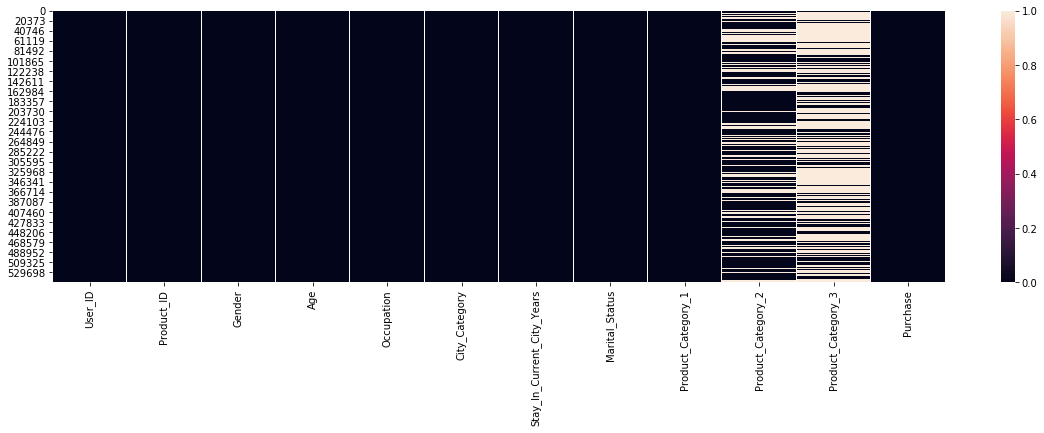

In [7]:
fig=plt.figure(figsize=(20,5))
sns.heatmap(train.isna())
plt.show()

In [8]:
print( 'NULL Values of Product_Category_2 from training data set '+str((train.Product_Category_2.isna().sum())*100/len(train))+' %' )
print( 'NULL Values of Product_Category_3 from training data set '+str((train.Product_Category_3.isna().sum())*100/len(train))+' %' )

NULL Values of Product_Category_2 from training data set 31.566642669633573 %
NULL Values of Product_Category_3 from training data set 69.67265865311198 %


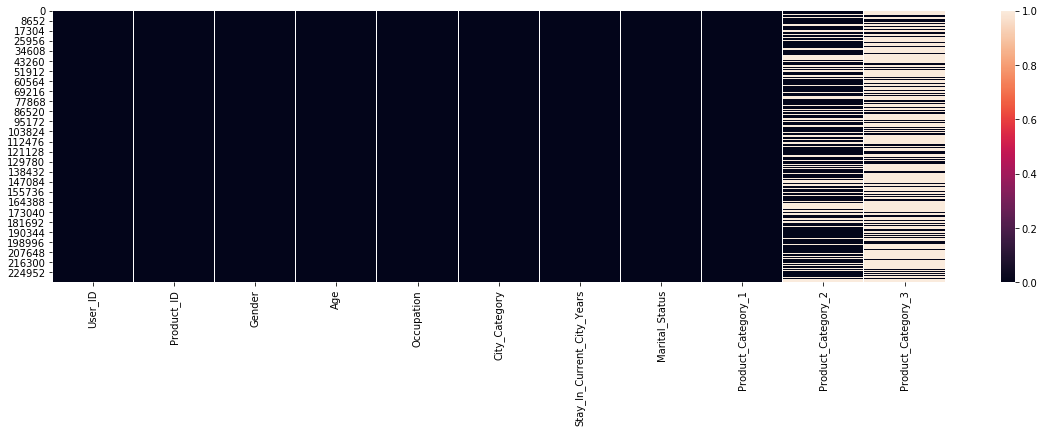

In [9]:
fig=plt.figure(figsize=(20,5))
sns.heatmap(test.isna())
plt.show()

In [10]:
print( 'NULL Values of Product_Category_2 from testing data set '
      +str((test.Product_Category_2.isna().sum())*100/len(test))+' %' )
print( 'NULL Values of Product_Category_3 from testing data set '
      +str((test.Product_Category_3.isna().sum())*100/len(test))+' %' )

NULL Values of Product_Category_2 from testing data set 30.96931065629562 %
NULL Values of Product_Category_3 from testing data set 69.59019516350669 %


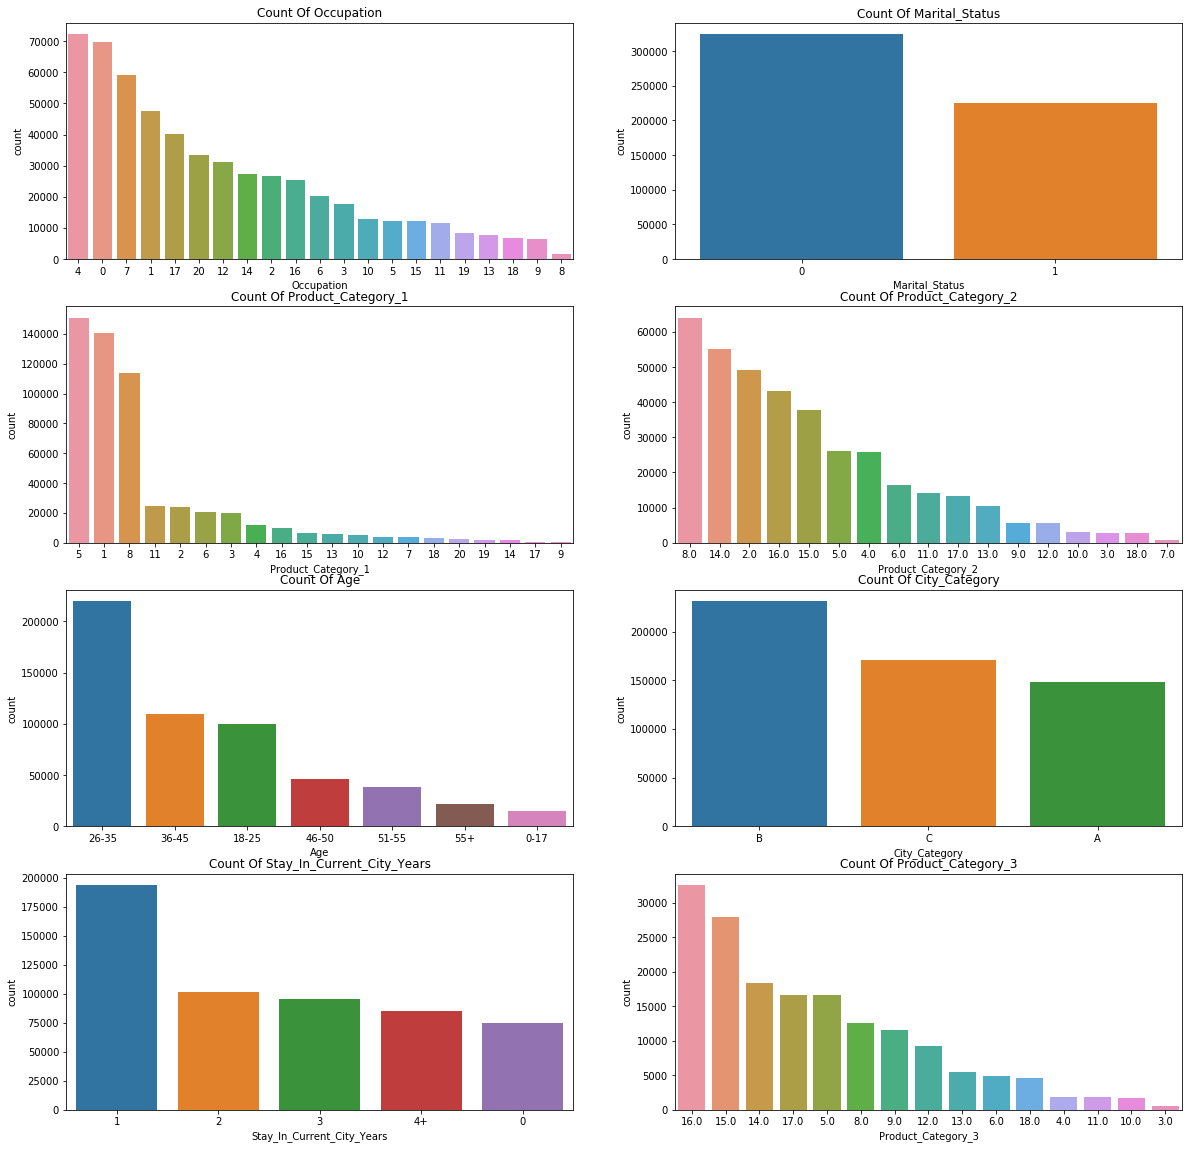

In [11]:
fig=plt.figure(figsize=(20,20))
j=1
for i in ['Occupation','Marital_Status','Product_Category_1','Product_Category_2','Age',
          'City_Category','Stay_In_Current_City_Years','Product_Category_3']:
    plt.subplot(4,2,j)
    sns.countplot(train[i], order=train[i].value_counts().index)
    plt.title('Count Of '+i)
    j+=1
plt.show()

# Observations: 

# 1. Product_Category_3  has more than 50% NULL values needs to be                    deleted

# 2. Product_Category_2 has 30.9% NULL Values needs to be filled.

# 3. Product_Category_2 is in float type need to convert it into integer.

# 4. '+' needs to be replaced.

# 5. User_ID and Product_ID can be dropped.

# Exploratory Data Analysis

## Univariate Analysis

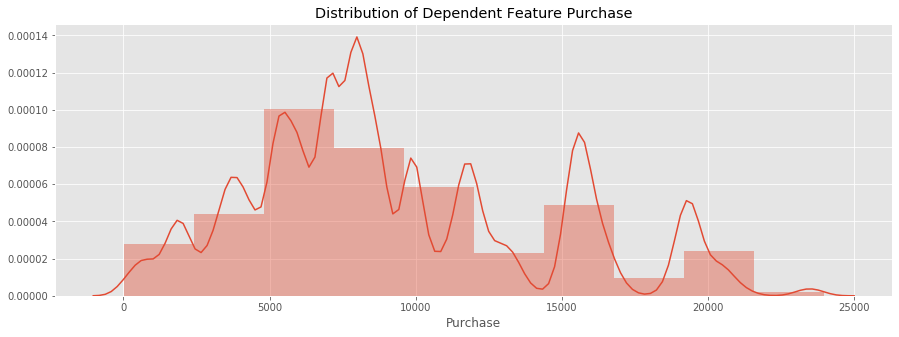

In [12]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(15,5))
plt.title('Distribution of Dependent Feature Purchase')
sns.distplot(train.Purchase,bins=10)
plt.show()

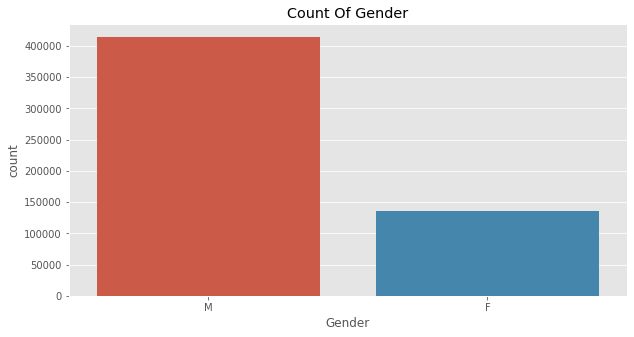

In [13]:
fig=plt.figure(figsize=(10,5))
sns.countplot(train.Gender,order=train.Gender.value_counts().index)
plt.title("Count Of Gender")
plt.show()

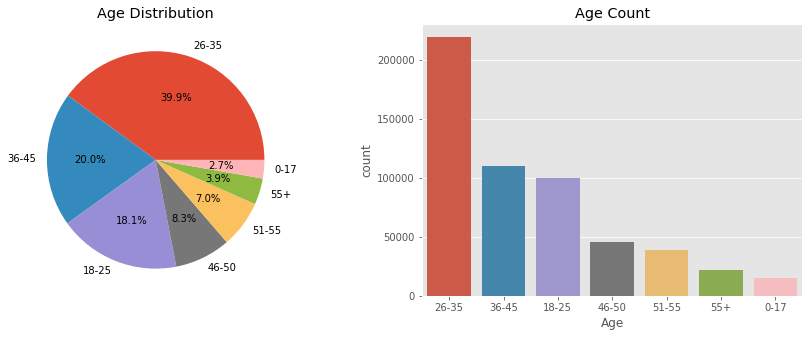

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(train.Age.value_counts(),labels=train.Age.value_counts().index,autopct='%1.1f%%')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.countplot(train.Age,order=train.Age.value_counts().index)
plt.title('Age Count')
plt.show()

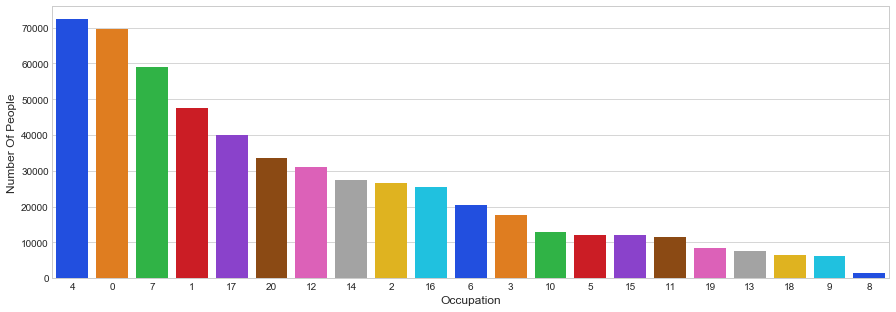

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,5))
sns.countplot(x=train.Occupation,order=train.Occupation.value_counts().index,palette = 'bright')
plt.ylabel('Number Of People')
plt.show()

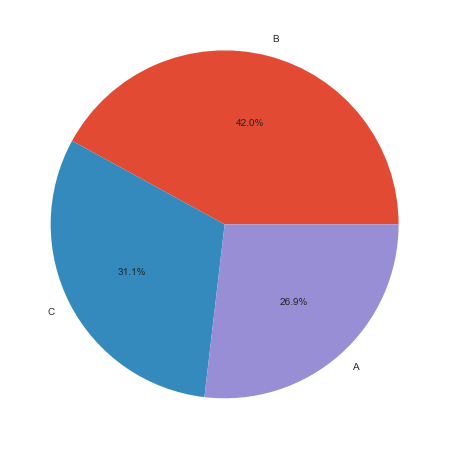

In [16]:
plt.figure(figsize=(8,8))
plt.pie(train.City_Category.value_counts(),labels=train.City_Category.value_counts().index,autopct='%1.1f%%')
plt.show()

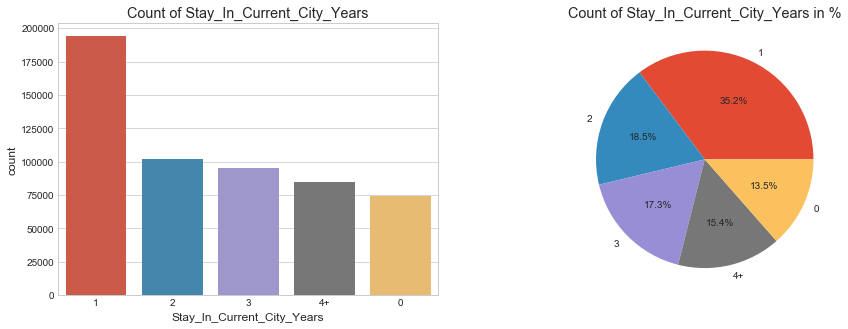

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train.Stay_In_Current_City_Years,order=train.Stay_In_Current_City_Years.value_counts().index)
plt.title('Count of Stay_In_Current_City_Years')
plt.subplot(1,2,2)
plt.pie(train.Stay_In_Current_City_Years.value_counts(),
        labels=train.Stay_In_Current_City_Years.value_counts().index,autopct='%1.1f%%')
plt.title('Count of Stay_In_Current_City_Years in %')
plt.show()

In [18]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Bi-variate Analysis

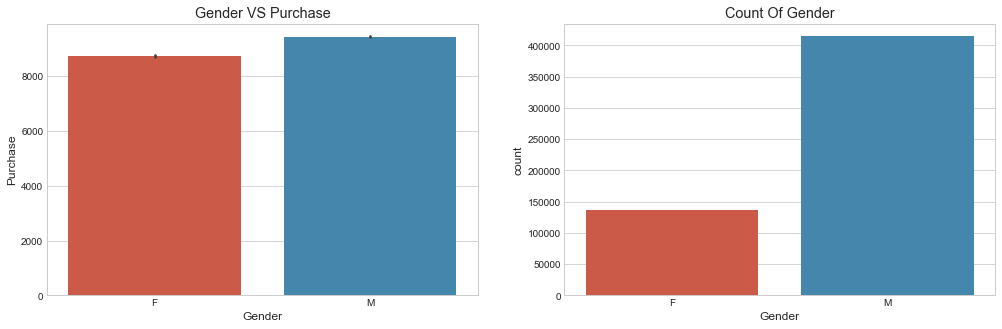

In [19]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(train.Gender,train.Purchase)
plt.title('Gender VS Purchase')

plt.subplot(1,2,2)
sns.countplot(train.Gender)
plt.title('Count Of Gender')
plt.show()

## Even though Females are Low in number there Purchase amount is equal to Men.

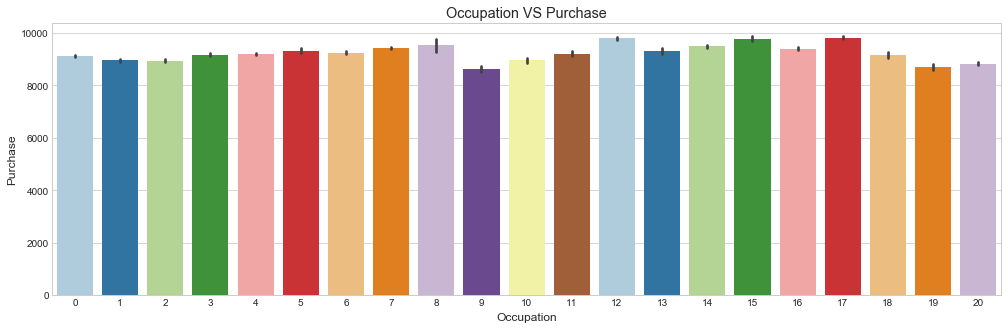

In [20]:
plt.figure(figsize=(17,5))
#sns.boxplot(train.Occupation,train.Purchase,palette = 'Paired')
sns.barplot(train.Occupation,train.Purchase,palette = 'Paired')
plt.title('Occupation VS Purchase')
plt.show()

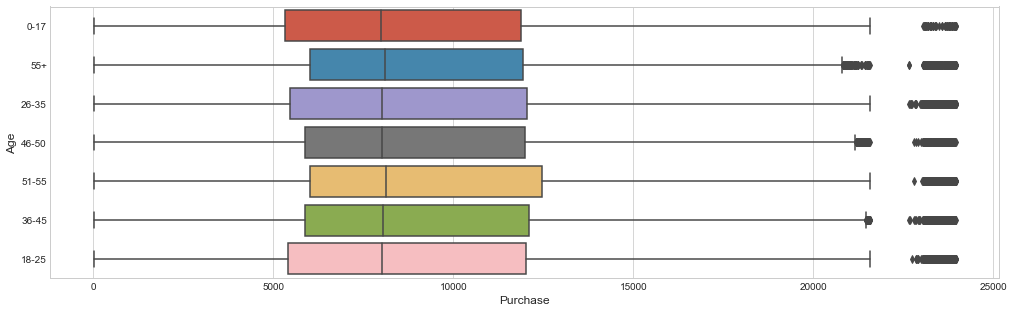

In [21]:
plt.figure(figsize=(17,5))
sns.boxplot(train.Purchase,train.Age)
plt.show()

In [22]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


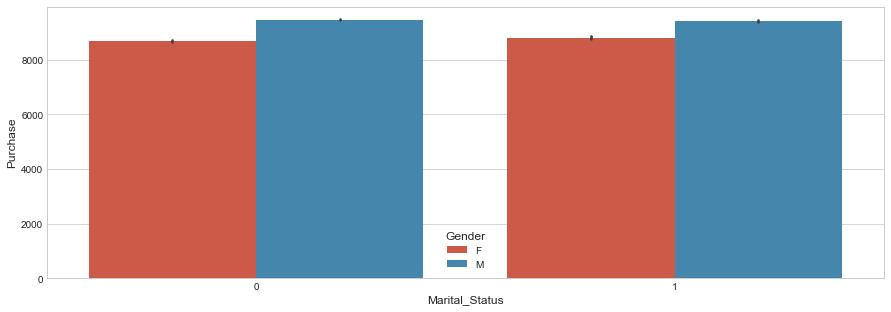

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(train.Marital_Status,train.Purchase,hue=train.Gender)
plt.show()

## There is no much of a difference between Married and Un-married Men,Women

# Multivariate Analysis

In [24]:
#sns.pairplot(train)
#plt.show()

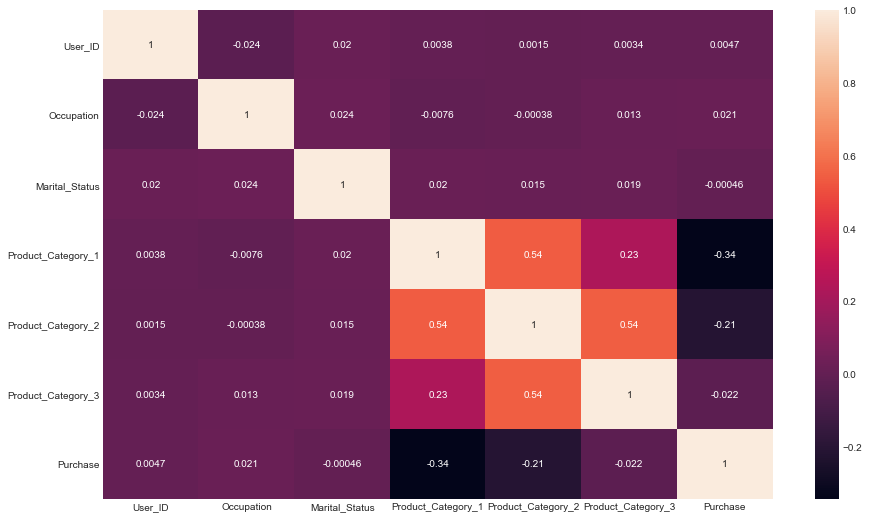

In [25]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(),annot=True)
plt.show()

# Product_Category_1 and Product_Category_2 are corelated to purchase

# Data Pre-Processing

In [26]:
train['Source']='Train'
test['Source']='Test'

In [27]:
df=pd.concat([train,test])

In [28]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Train


In [29]:
df.tail(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,Test
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN,Test


In [30]:
#df['Age']=df['Age'].replace('0-17',17)
#df['Age']=df['Age'].replace('18-25',25)
#df['Age']=df['Age'].replace('26-35',35)
#df['Age']=df['Age'].replace('36-45',45)
#df['Age']=df['Age'].replace('46-50',50)
#df['Age']=df['Age'].replace('51-55',55)
#df['Age']=df['Age'].replace('55+',56)

df.Age=df.Age.apply(lambda x: str(x).replace('55+','55'))
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.apply(lambda x: str(x).replace('4+','4'))

In [31]:
df.drop('User_ID',axis=1,inplace=True)

df.drop('Product_ID',axis=1,inplace=True)

df.drop('Product_Category_3',axis=1,inplace=True)

In [32]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Source
0,F,0-17,10,A,2,0,3,NaN,8370.0,Train
1,F,0-17,10,A,2,0,1,6.0,15200.0,Train
2,F,0-17,10,A,2,0,12,NaN,1422.0,Train
3,F,0-17,10,A,2,0,12,14.0,1057.0,Train
4,M,55,16,C,4,0,8,NaN,7969.0,Train


## Feature Encoding

In [33]:
encoder=LabelEncoder()

df.Gender=encoder.fit_transform(df.Gender)

df.Age=encoder.fit_transform(df.Age)

df.City_Category=encoder.fit_transform(df.City_Category)

In [34]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Source
0,0,0,10,0,2,0,3,NaN,8370.0,Train
1,0,0,10,0,2,0,1,6.0,15200.0,Train
2,0,0,10,0,2,0,12,NaN,1422.0,Train
3,0,0,10,0,2,0,12,14.0,1057.0,Train
4,1,6,16,2,4,0,8,NaN,7969.0,Train


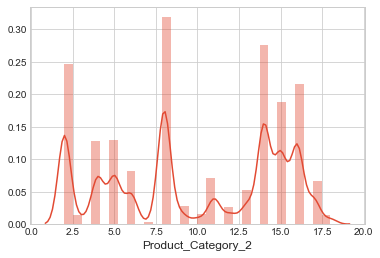

In [35]:
sns.distplot(df.Product_Category_2.dropna(),bins=30)
plt.show()

In [36]:
df.Product_Category_2.fillna(df.Product_Category_2.median(),inplace=True)

In [37]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Source
0,0,0,10,0,2,0,3,9.0,8370.0,Train
1,0,0,10,0,2,0,1,6.0,15200.0,Train
2,0,0,10,0,2,0,12,9.0,1422.0,Train
3,0,0,10,0,2,0,12,14.0,1057.0,Train
4,1,6,16,2,4,0,8,9.0,7969.0,Train


In [38]:
df.Product_Category_2=df.Product_Category_2.astype(int)

In [39]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Source
0,0,0,10,0,2,0,3,9,8370.0,Train
1,0,0,10,0,2,0,1,6,15200.0,Train
2,0,0,10,0,2,0,12,9,1422.0,Train
3,0,0,10,0,2,0,12,14,1057.0,Train
4,1,6,16,2,4,0,8,9,7969.0,Train


In [40]:
train=df.loc[df.Source=='Train']
test=df.loc[df.Source=='Test']

In [41]:
train.drop('Source',axis=1,inplace=True)

In [42]:
test.drop('Source',axis=1,inplace=True)

In [43]:
y_train=train.Purchase
x_test=test

In [44]:
train.drop('Purchase',axis=1,inplace=True)

In [45]:
x_train=train

In [46]:
x_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,10,0,2,0,3,9
1,0,0,10,0,2,0,1,6
2,0,0,10,0,2,0,12,9
3,0,0,10,0,2,0,12,14
4,1,6,16,2,4,0,8,9


In [47]:
x_train.shape

(550068, 8)

In [48]:
y_train.shape

(550068,)

In [49]:
y_train.head(10)

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
5    15227.0
6    19215.0
7    15854.0
8    15686.0
9     7871.0
Name: Purchase, dtype: float64

In [50]:
y_train.tail(10)

550058    121.0
550059     48.0
550060    494.0
550061    599.0
550062    473.0
550063    368.0
550064    371.0
550065    137.0
550066    365.0
550067    490.0
Name: Purchase, dtype: float64

In [51]:
x_train.Stay_In_Current_City_Years=x_train.Stay_In_Current_City_Years.astype(int)

In [52]:
x_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,10,0,2,0,3,9
1,0,0,10,0,2,0,1,6
2,0,0,10,0,2,0,12,9
3,0,0,10,0,2,0,12,14
4,1,6,16,2,4,0,8,9


In [53]:
scaler = StandardScaler()
for i in x_train.columns:
    x_train.i=scaler.fit_transform(x_train[i].values.reshape(-1,1))
for i in x_test.columns:
    x_test.i=scaler.fit_transform(x_test[i].values.reshape(-1,1))

# Linear Regression

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
Y_pred_lin_reg = lin_reg.predict(x_train)

In [55]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_train, Y_pred_lin_reg)))
print("R2 score:", r2_score(y_train, Y_pred_lin_reg))

Linear Regression: 
RMSE: 4694.547741189686
R2 score: 0.12652466661351902


# KNN

In [56]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
Y_pred_knn = knn.predict(x_train)

In [57]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_train, Y_pred_knn)))
print("R2 score:", r2_score(y_train, Y_pred_knn))

KNN regression: 
RMSE: 2929.273245434345
R2 score: 0.659918587953625


# Decision Tree Regression

In [58]:
dec_tree = DecisionTreeRegressor(max_depth=10,random_state=27)
dec_tree.fit(x_train, y_train)
Y_pred_dec = dec_tree.predict(x_train)

In [59]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_train, Y_pred_dec)))
print("R2 score:", r2_score(y_train, Y_pred_dec))

Decision tree regression: 
RMSE: 2963.1895222334515
R2 score: 0.6519978044451504


# Random Forest Regressor

In [60]:
ran_for = RandomForestRegressor(n_estimators = 100,random_state = 42,max_depth=8)
ran_for.fit(x_train, y_train)
Y_pred_ran_for = ran_for.predict(x_train)

In [61]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_train, Y_pred_ran_for)))
print("R2 score:", r2_score(y_train, Y_pred_ran_for))

Random forest regression: 
RMSE: 2975.869507366789
R2 score: 0.6490131125145269


# XGB Regressor

In [62]:
xgb = XGBRegressor(random_state = 42)
xgb.fit(x_train, y_train)
Y_pred_xgb = xgb.predict(x_train)

In [63]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_train, Y_pred_xgb)))
print("R2 score:", r2_score(y_train, Y_pred_xgb))

XGB regression: 
RMSE: 2893.144884692909
R2 score: 0.6682556833807123


## Hyper tuning

In [71]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

xgb_cv.fit(x_train, y_train)

print(xgb_cv.best_score_)
print(xgb_cv.best_params_)

xgb_best = XGBRegressor(colsample_bytree = 0.5, gamma = 0.3, 
                        learning_rate = 0.5, max_depth = 18, min_child_weight = 53, 
                        verbosity = 0, random_state = 42)
xgb_best.fit(x_train, y_train)
Y_pred_xgb_best = xgb_best.predict(x_train)

print()
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_train, Y_pred_xgb_best)))
print("R2 score:", r2_score(y_train, Y_pred_xgb_best))

0.6608781755770299
{'min_child_weight': 53, 'max_depth': 18, 'learning_rate': '0.5', 'gamma': 0.3, 'colsample_bytree': 0.5}

XGB regression: 
RMSE: 2795.700748440647
R2 score: 0.6902263373902044


In [72]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,4,7,1,2,1,1,11,NaN
1,1,2,17,2,0,0,3,5,NaN
2,0,3,1,1,4,1,5,14,NaN
3,0,3,1,1,4,1,4,9,NaN
4,0,2,1,2,1,0,4,5,NaN


In [73]:
x_test=test

In [74]:
#x_test.drop(['Gender','City_Category','Marital_Status','Purchase'],axis=1,inplace=True)
x_test.drop(['Purchase'],axis=1,inplace=True)

In [75]:
x_test.Stay_In_Current_City_Years=x_test.Stay_In_Current_City_Years.astype(int)

In [76]:
x_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1,4,7,1,2,1,1,11
1,1,2,17,2,0,0,3,5
2,0,3,1,1,4,1,5,14
3,0,3,1,1,4,1,4,9
4,0,2,1,2,1,0,4,5


In [77]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

xgb_cv.fit(x_train, y_train)

print(xgb_cv.best_score_)
print(xgb_cv.best_params_)

xgb_best = XGBRegressor(colsample_bytree = 0.5, gamma = 0.3, 
                        learning_rate = 0.5, max_depth = 18, min_child_weight = 53, 
                        verbosity = 0, random_state = 42)
xgb_best.fit(x_train, y_train)
Y_pred_xgb_best = xgb_best.predict(x_test)

0.6608781755770299
{'min_child_weight': 53, 'max_depth': 18, 'learning_rate': '0.5', 'gamma': 0.3, 'colsample_bytree': 0.5}


In [78]:
sample_submission.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [79]:
sample_submission.Purchase=Y_pred_xgb_best

In [80]:
sample_submission.to_csv('D:\\Data Science\\Black-Friday-Sales-Prediction\\sub.csv',index=False)

In [81]:
sample_submission.head()

,Purchase,User_ID,Product_ID
0,16405.785156,1000004,P00128942
1,10588.294922,1000009,P00113442
2,7034.409668,1000010,P00288442
3,2830.575928,1000010,P00145342
4,2605.923828,1000011,P00053842
